<a href="https://colab.research.google.com/github/welashi/ANN/blob/main/nn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def act(x):
    return 0 if x < 0.5 else 1

def go(center, firstFloor, design):
    x = np.array([center, firstFloor, design])
    w11 = [0.3, 0.3, 0]
    w12 = [0.4, -0.5, 1]
    weight1 = np.array([w11, w12])
    weight2 = np.array([-1, 1])

    sum_hidden = np.dot(weight1, x)
    print("Значения сумм на нейронах скрытого слоя: "+str(sum_hidden))

    out_hidden = np.array([act(x) for x in sum_hidden])
    print("Значения на выходах нейронов скрытого слоя: "+str(out_hidden))

    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
    print("Выходное значение НС: "+str(y))

    return y

center = 1
firstFloor = 0
design = 1

res = go(center, firstFloor, design)
if res == 1:
    print("Беру квартиру")
else:
    print("Не то, что мне надо")

Значения сумм на нейронах скрытого слоя: [0.3 1.4]
Значения на выходах нейронов скрытого слоя: [0 1]
Выходное значение НС: 1
Беру квартиру


Класс C2
Класс C2
Класс C2
Класс C2
Класс C2


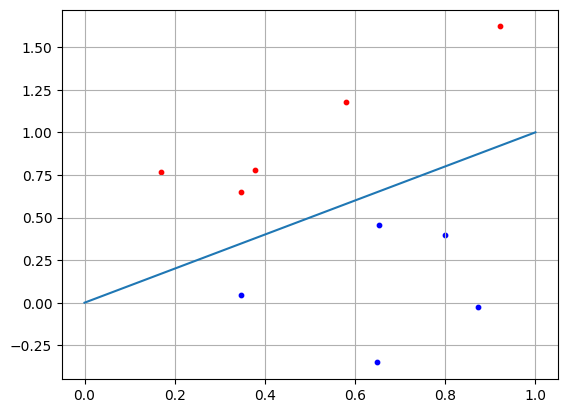

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1, x2]

f = [0, 1]

w = np.array([-0.3, 0.3])
for i in range(N):
    x = np.array([C2[0][i], C2[1][i]])
    y = np.dot(w, x)
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

Класс C1
Класс C1
Класс C1
Класс C1
Класс C1


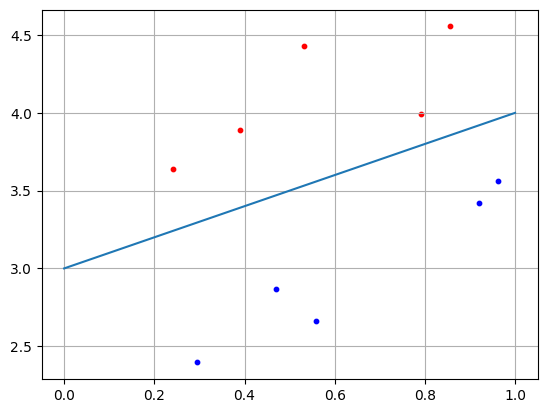

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
b = 3

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)] + b
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1 + b
C2 = [x1, x2]

f = [0+b, 1+b]

w2 = 0.5
w3 = -b*w2
w = np.array([-w2, w2, w3])
for i in range(N):
    x = np.array([C1[0][i], C1[1][i], 1])
    y = np.dot(w, x)
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def act(x):
    return 0 if x <= 0 else 1

def go(C):
    x = np.array([C[0], C[1], 1])
    w1 = [1, 1, -1.5]
    w2 = [1, 1, -0.5]
    w_hidden = np.array([w1, w2])
    w_out = np.array([-1, 1, -0.5])

    sum = np.dot(w_hidden, x)
    out = [act(x) for x in sum]
    out.append(1)
    out = np.array(out)

    sum = np.dot(w_out, out)
    y = act(sum)
    return y

C1 = [(1,0), (0,1)]
C2 = [(0,0), (1,1)]

print( go(C1[0]), go(C1[1]) )
print( go(C2[0]), go(C2[1]) )

1 1
0 0


В качестве активационной функции выберем гиперболический тангенс:

${{f(x)=\frac{2}{(1+e^{-x})}-1}}$

Значение производной

${{f'(x)=\frac{1}{2}*(1+f(x))*(1-f(x))}}$

In [5]:
import numpy as np

def f(x):
    """ В качестве активационной функции выберем гиперболический тангенс: """
    return 2/(1 + np.exp(-x)) - 1

def df(x):
    return 0.5*(1 + x)*(1 - x)

W1 = np.array([[-0.2, 0.3, -0.4], [0.1, -0.3, -0.4]])
W2 = np.array([0.2, 0.3])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01          # шаг обучения
    N = 10000           # число итераций при обучении
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)]  # случайных выбор входного сигнала из обучающей выборки
        y, out = go_forward(x[0:3])             # прямой проход по НС и вычисление выходных значений нейронов
        e = y - x[-1]                           # ошибка
        delta = e*df(y)                         # локальный градиент
        W2[0] = W2[0] - lmd * delta * out[0]    # корректировка веса первой связи
        W2[1] = W2[1] - lmd * delta * out[1]    # корректировка веса второй связи

        delta2 = W2*delta*df(out)               # вектор из 2-х величин локальных градиентов

        # корректировка связей первого слоя
        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

# обучающая выборка (она же полная выборка)
epoch = [(-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, -1)]

train(epoch)        # запуск обучения сети

# проверка полученных результатов
for x in epoch:
    y, out = go_forward(x[0:3])
    print(f"Выходное значение НС: {y} => {x[-1]}")

Выходное значение НС: 0.008135398310799014 => -1
Выходное значение НС: 0.931967187194122 => 1
Выходное значение НС: -0.8721633957039779 => -1
Выходное значение НС: 0.8666044761847564 => 1
Выходное значение НС: -0.8666044761847564 => -1
Выходное значение НС: 0.8721633957039778 => 1
Выходное значение НС: -0.9319671871941219 => -1
Выходное значение НС: -0.008135398310799014 => -1
